In [2]:
'''Main'''
import numpy as np
import pandas as pd
import os

'''Data Viz'''
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

%matplotlib inline

'''Data Prep'''
from sklearn import preprocessing as pp 
from scipy.stats import pearsonr 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import log_loss 
from sklearn.metrics import precision_recall_curve, average_precision_score 
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report 

'''Algos'''
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [3]:
import numpy as np
import pandas as pd
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error, roc_curve, classification_report,auc)
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
def get_metrics(expected, predicted):
    print(classification_report(expected,predicted))
    accuracy = accuracy_score(expected, predicted)
    recall = recall_score(expected, predicted, average="binary")
    precision = precision_score(expected, predicted , average="binary")
    f1 = f1_score(expected, predicted , average="binary")

    cm = metrics.confusion_matrix(expected, predicted)
    TN = cm[0][0]
    FN = cm[1][0]
    TP = cm[1][1]
    FP = cm[0][1]

    
    sensitivity  = TP / (TP+FN)
    tpr = sensitivity
    specificity  = TN / (TN+FP)
    fpr = 1 - specificity
    pos_pred_val = TP/ (TP+FP)
    neg_pred_val = TN/ (TN+FN)

    print("Sensitivity:  ", round(sensitivity, 3))
    print("Specificity:  ", round(specificity, 3))
    print("Pos_pred_val: ", round(pos_pred_val, 3))
    print("Neg_pred_val: ", round(neg_pred_val, 3))
    print("TPR:          ", round(tpr, 3))
    print("FPR:          ", round(fpr, 3))

    print("Accuracy:     ",round(accuracy, 3))
    print("precision:    ",round(precision, 3))
    print("recall:       ",round(recall, 3))
    print("f-score:      ",round(f1, 3))
    print("*"*80)
    print(cm)
    print("*"*80)
    df_cm = pd.DataFrame(cm, columns=np.unique(expected), index = np.unique(expected))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    plt.figure(figsize = (5,5))
    sn.set(font_scale=1.4)#for label size
    sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [5]:
import os
# Acquire Data
current_path = os.getcwd()
file = '\\IDS\\Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv'
data_df0 = pd.read_csv(current_path + file)

file = '\\IDS\\Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv'
data_df1 = pd.read_csv(current_path + file)
file = '\\IDS\\Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv'
data_df2 = pd.read_csv(current_path + file)

file = '\\IDS\\Friday-23-02-2018_TrafficForML_CICFlowMeter.csv'
data_df3 = pd.read_csv(current_path + file)
file = '\\IDS\\Wednesday-21-02-2018_TrafficForML_CICFlowMeter.csv'
data_df4 = pd.read_csv(current_path + file)
file = '\\IDS\\Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv'
data_df5 = pd.read_csv(current_path + file)
file = '\\IDS\\Friday-16-02-2018_TrafficForML_CICFlowMeter.csv'
data_df6 = pd.read_csv(current_path + file)
file = '\\IDS\\Friday-02-03-2018_TrafficForML_CICFlowMeter.csv'
data_df7 = pd.read_csv(current_path + file)
file = '\\IDS\\Wednesday-28-02-2018_TrafficForML_CICFlowMeter.csv'
data_df8 = pd.read_csv(current_path + file)

In [6]:
print(data_df0.shape)
print(data_df1.shape)
print(data_df2.shape)
print(data_df3.shape)
print(data_df4.shape)
print(data_df5.shape)
print(data_df6.shape)
print(data_df7.shape)
print(data_df8.shape)

(328181, 79)
(1048575, 79)
(1048575, 79)
(1048575, 79)
(1048575, 79)
(1048575, 79)
(1048574, 79)
(1044525, 79)
(606902, 79)


In [7]:
df0 = data_df0.sample(frac=0.1,random_state=2018)
df1 = data_df1.sample(frac=0.1,random_state=2018)
df2 = data_df2.sample(frac=0.1,random_state=2018)
df3 = data_df3.sample(frac=0.1,random_state=2018)
df4 = data_df4.sample(frac=0.1,random_state=2018)
df5 = data_df5.sample(frac=0.1,random_state=2018)
df6 = data_df6.sample(frac=0.1,random_state=2018)
df7 = data_df7.sample(frac=0.1,random_state=2018)
df8 = data_df8.sample(frac=0.1,random_state=2018)

In [8]:
print(df0.shape)
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)
print(df7.shape)
print(df8.shape)

(32818, 79)
(104858, 79)
(104858, 79)
(104858, 79)
(104858, 79)
(104858, 79)
(104857, 79)
(104452, 79)
(60690, 79)


In [9]:
df_stack = pd.concat([df0, df1,df2,df3,df4,df5,df6,df7,df8], axis=0)

In [10]:
df_stack.shape

(827107, 79)

In [11]:
df_stack.head

<bound method NDFrame.head of         Dst Port  Protocol  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  \
144899    3389.0       6.0      3809600.0          14.0           8.0   
307875      53.0      17.0          214.0           1.0           1.0   
118114     443.0       6.0    118296324.0          14.0          15.0   
194771      53.0      17.0       182460.0           2.0           2.0   
96848    51131.0       6.0       242281.0           2.0           0.0   
306557      53.0      17.0          246.0           1.0           1.0   
8800     61421.0       6.0           26.0           2.0           0.0   
115252     443.0       6.0    116993045.0          13.0          12.0   
69735        0.0       0.0    117792665.0          62.0           0.0   
118218     443.0       6.0    117513588.0          16.0          14.0   
212575      53.0      17.0        18802.0           1.0           1.0   
236610     135.0       6.0         2894.0           3.0           3.0   
219489     443.0     

In [12]:
df_stack = df_stack[df_stack.Label >= 0 ]

In [13]:
df_stack.shape

(824849, 79)

In [14]:
df_stack.loc[df_stack['Label'] == 0]

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
144899,3389.0,6.0,3809600.0,14.0,8.0,1392.0,443.0,684.0,0.0,99.428571,...,20.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
307875,53.0,17.0,214.0,1.0,1.0,33.0,49.0,33.0,33.0,33.000000,...,8.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
118114,443.0,6.0,118296324.0,14.0,15.0,1242.0,4124.0,605.0,0.0,88.714286,...,20.0,230671.5,1.719875e+05,352285.0,109058.0,58900000.0,1.255157e+05,59000000.0,58800000.0,0.0
194771,53.0,17.0,182460.0,2.0,2.0,72.0,318.0,36.0,36.0,36.000000,...,8.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
96848,51131.0,6.0,242281.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,20.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
306557,53.0,17.0,246.0,1.0,1.0,38.0,54.0,38.0,38.0,38.000000,...,8.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
8800,61421.0,6.0,26.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,20.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
115252,443.0,6.0,116993045.0,13.0,12.0,597.0,3915.0,197.0,0.0,45.923077,...,20.0,106406.0,4.050025e+04,135044.0,77768.0,58400000.0,5.414020e+05,58700000.0,58000000.0,0.0
69735,0.0,0.0,117792665.0,62.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,34000000.0,4.130000e+07,63200000.0,4795985.0,13000000.0,1.220000e+07,27000000.0,5298640.0,0.0
212575,53.0,17.0,18802.0,1.0,1.0,40.0,102.0,40.0,40.0,40.000000,...,8.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0


In [15]:
df_stack.loc[df_stack['Label'] == 1]

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
118218,443.0,6.0,117513588.0,16.0,14.0,1244.0,4123.0,607.0,0.0,77.750000,...,20.0,2.079185e+05,139648.63950,306665.0,109172.0,58400000.0,6.997239e+05,58900000.0,58000000.0,1.0
218243,53.0,17.0,15756.0,1.0,1.0,40.0,119.0,40.0,40.0,40.000000,...,8.0,0.000000e+00,0.00000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,1.0
269727,443.0,6.0,475.0,3.0,0.0,77.0,0.0,46.0,0.0,25.666667,...,20.0,0.000000e+00,0.00000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,1.0
305104,53.0,17.0,813.0,1.0,1.0,44.0,252.0,44.0,44.0,44.000000,...,8.0,0.000000e+00,0.00000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,1.0
323003,50931.0,6.0,37.0,3.0,1.0,31.0,0.0,31.0,0.0,10.333333,...,20.0,0.000000e+00,0.00000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,1.0
40951,1095.0,6.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,...,24.0,0.000000e+00,0.00000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,1.0
230714,443.0,6.0,118007.0,9.0,7.0,553.0,3773.0,202.0,0.0,61.444444,...,20.0,0.000000e+00,0.00000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,1.0
240391,443.0,6.0,103653.0,9.0,8.0,509.0,7502.0,194.0,0.0,56.555556,...,20.0,0.000000e+00,0.00000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,1.0
169579,3389.0,6.0,2108367.0,8.0,7.0,1128.0,1581.0,661.0,0.0,141.000000,...,20.0,0.000000e+00,0.00000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,1.0
103485,443.0,6.0,60091926.0,4.0,2.0,148.0,252.0,74.0,0.0,37.000000,...,20.0,7.762600e+04,0.00000,77626.0,77626.0,59900000.0,0.000000e+00,59900000.0,59900000.0,1.0


In [16]:
correlationMatrix = pd.DataFrame(data=[],index=df_stack.columns,columns=df_stack.columns)
for i in df_stack.columns:
    for j in df_stack.columns:
        correlationMatrix.loc[i,j] = np.round(pearsonr(df_stack.loc[:,i],df_stack.loc[:,j])[0],2)

C:\Users\Vidhya16\.conda\envs\deeplearning\lib\site-packages\scipy\stats\stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
C:\Users\Vidhya16\.conda\envs\deeplearning\lib\site-packages\scipy\stats\stats.py:5256: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


In [17]:
correlationMatrix.head()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
Dst Port,1,-0.25,-0.01,-0.01,-0.01,-0.01,-0.01,0.37,-0.18,0.32,...,0.18,-0.03,-0.03,-0.03,-0.02,0,-0,0,0.05,-0.27
Protocol,-0.25,1,-0.05,0.03,-0.02,0.02,-0.01,-0.26,0.72,-0.07,...,-0.66,-0.05,-0.05,-0.06,-0.04,-0.01,-0,-0,-0.11,-0.25
Flow Duration,-0.01,-0.05,1,0.01,0.02,0.01,0.01,0.02,-0.02,-0,...,-0.01,0.03,0.04,0.05,0.02,-0.96,-0.97,-0.97,-0.57,-0.04
Tot Fwd Pkts,-0.01,0.03,0.01,1,0.03,0.98,0.03,-0.01,0.01,-0,...,-0.02,0,0,0,0,-0,0,-0,-0,0.02
Tot Bwd Pkts,-0.01,-0.02,0.02,0.03,1,0.01,1,0.04,-0.01,0.01,...,0,0.05,0.02,0.05,0.05,0,0,0,0.02,-0.02


In [18]:
# Select upper triangle of correlation matrix
upper = correlationMatrix.where(np.triu(np.ones(correlationMatrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

In [19]:
to_drop

['TotLen Fwd Pkts',
 'TotLen Bwd Pkts',
 'Fwd Pkt Len Mean',
 'Fwd Pkt Len Std',
 'Bwd Pkt Len Min',
 'Bwd Pkt Len Std',
 'Flow IAT Max',
 'Flow IAT Min',
 'Fwd IAT Tot',
 'Fwd IAT Mean',
 'Fwd IAT Std',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Bwd IAT Max',
 'Bwd IAT Min',
 'Fwd Header Len',
 'Bwd Header Len',
 'Fwd Pkts/s',
 'Bwd Pkts/s',
 'Pkt Len Min',
 'Pkt Len Max',
 'Pkt Len Mean',
 'Pkt Len Std',
 'SYN Flag Cnt',
 'CWE Flag Count',
 'ECE Flag Cnt',
 'Pkt Size Avg',
 'Fwd Seg Size Avg',
 'Bwd Seg Size Avg',
 'Subflow Fwd Pkts',
 'Subflow Fwd Byts',
 'Subflow Bwd Pkts',
 'Subflow Bwd Byts',
 'Fwd Act Data Pkts',
 'Active Max',
 'Active Min',
 'Idle Mean',
 'Idle Std',
 'Idle Max']

In [20]:
# Generate feature matrix and labels array
dataX = df_stack.copy().drop(['Label','TotLen Fwd Pkts',
                             'TotLen Bwd Pkts', 'Fwd Pkt Len Mean',
 'Fwd Pkt Len Std',
 'Bwd Pkt Len Max',
 'Bwd Pkt Len Min',
 'Bwd Pkt Len Std',
 'Flow IAT Max',
 'Flow IAT Min',
 'Fwd IAT Tot',
 'Fwd IAT Mean',
 'Fwd IAT Std',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Bwd IAT Max',
 'Bwd IAT Min',
 'Fwd Header Len',
 'Bwd Header Len',
 'Fwd Pkts/s', 'Bwd Pkts/s',
 'Pkt Len Min',
 'Pkt Len Max',
 'Pkt Len Mean',
 'Pkt Len Std',
 'SYN Flag Cnt',
 'PSH Flag Cnt',
 'ECE Flag Cnt',
 'Pkt Size Avg',
 'Fwd Seg Size Avg',
 'Bwd Seg Size Avg',
 'Subflow Fwd Pkts',
 'Subflow Fwd Byts',
 'Subflow Bwd Pkts',
 'Subflow Bwd Byts','Fwd Act Data Pkts',
 'Active Max',
 'Active Min',
 'Idle Mean',
 'Idle Max',
 'Idle Min','Bwd PSH Flags','Fwd URG Flags','Bwd URG Flags',
'CWE Flag Count' ,'Fwd Byts/b Avg',
'Fwd Pkts/b Avg',
'Fwd Blk Rate Avg',
'Bwd Byts/b Avg',
'Bwd Pkts/b Avg',
'Bwd Blk Rate Avg' 
                              
],axis=1)

dataY = df_stack['Label'].copy()

In [21]:
dataX.shape

(824849, 28)

In [22]:
dataY.shape

(824849,)

In [23]:
import seaborn as sns

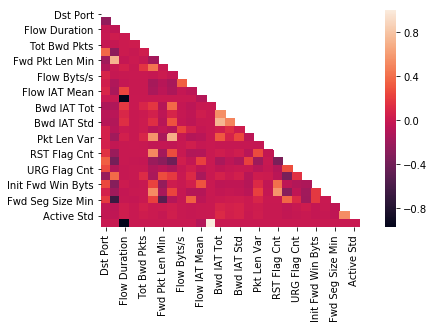

In [24]:
matrix = np.triu(dataX.corr())
sns.heatmap(dataX.corr(),mask=matrix)

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [26]:
from sklearn.preprocessing import StandardScaler
DataX = StandardScaler().fit_transform(dataX) 

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(DataX)
principalDf_train = pd.DataFrame(data = principalComponents)

In [31]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(principalDf_train, dataY, test_size = 0.30, random_state = 42)

In [32]:
from imblearn import under_sampling, over_sampling
print("Before OverSampling, counts of label '1': {}".format(sum(train_labels == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(train_labels == 0)))
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
train_features, train_labels = sm.fit_sample(train_features, train_labels) 
print('After OverSampling, the shape of train_X: {}'.format(train_features.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(train_labels.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(train_labels == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(train_labels == 0))) 


Before OverSampling, counts of label '1': 152196
Before OverSampling, counts of label '0': 425198 

After OverSampling, the shape of train_X: (850396, 2)
After OverSampling, the shape of train_y: (850396,) 

After OverSampling, counts of label '1': 425198
After OverSampling, counts of label '0': 425198


             precision    recall  f1-score   support

        0.0       0.97      0.27      0.42    182307
        1.0       0.32      0.98      0.48     65148

avg / total       0.80      0.45      0.44    247455

Sensitivity:   0.975
Specificity:   0.267
Pos_pred_val:  0.322
Neg_pred_val:  0.968
TPR:           0.975
FPR:           0.733
Accuracy:      0.454
precision:     0.322
recall:        0.975
f-score:       0.485
********************************************************************************
[[ 48728 133579]
 [  1611  63537]]
********************************************************************************


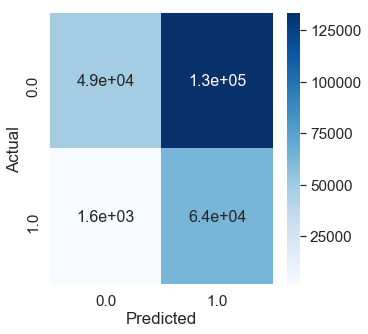

In [33]:
from sklearn.mixture import GaussianMixture 
gmm = GaussianMixture(n_components = 2) 
  
# Fit the GMM model for the dataset  
# which expresses the dataset as a  
# mixture of 3 Gaussian Distribution 
gmm.fit(train_features) 
  
# Assign a label to each sample 
labels = gmm.predict(test_features) 
# summarize the fit of the model

get_metrics(test_labels, labels)

             precision    recall  f1-score   support

        0.0       0.92      0.57      0.70    182307
        1.0       0.42      0.87      0.56     65148

avg / total       0.79      0.65      0.66    247455

Sensitivity:   0.869
Specificity:   0.565
Pos_pred_val:  0.417
Neg_pred_val:  0.923
TPR:           0.869
FPR:           0.435
Accuracy:      0.645
precision:     0.417
recall:        0.869
f-score:       0.563
********************************************************************************
[[103046  79261]
 [  8564  56584]]
********************************************************************************


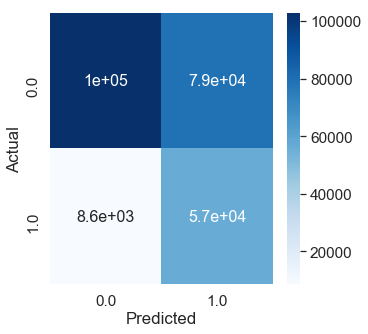

In [34]:
# fit a Naive Bayes model to the data
gnb = GaussianNB()
gnb.fit(train_features, train_labels)

# make predictions
expected = test_labels
predicted = gnb.predict(test_features)
# summarize the fit of the model
get_metrics(expected, predicted)

             precision    recall  f1-score   support

        0.0       0.98      0.98      0.98    182307
        1.0       0.93      0.94      0.94     65148

avg / total       0.97      0.97      0.97    247455

Sensitivity:   0.937
Specificity:   0.976
Pos_pred_val:  0.934
Neg_pred_val:  0.977
TPR:           0.937
FPR:           0.024
Accuracy:      0.966
precision:     0.934
recall:        0.937
f-score:       0.935
********************************************************************************
[[177982   4325]
 [  4135  61013]]
********************************************************************************


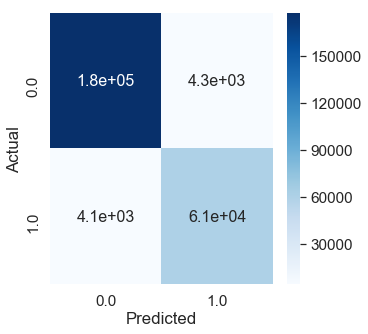

In [35]:
clf_rf = RandomForestClassifier(n_estimators=100)
clf_rf = clf_rf.fit(train_features, train_labels)
# make predictions
expected = test_labels
predicted = clf_rf.predict(test_features)
# summarize the fit of the model
get_metrics(expected, predicted)

In [36]:
print(dict(zip(dataX.columns, clf_rf.feature_importances_)))

{'Dst Port': 0.47037164739850323, 'Protocol': 0.5296283526014968}


             precision    recall  f1-score   support

        0.0       0.88      0.65      0.75    182307
        1.0       0.43      0.74      0.55     65148

avg / total       0.76      0.68      0.69    247455

Sensitivity:   0.743
Specificity:   0.651
Pos_pred_val:  0.432
Neg_pred_val:  0.876
TPR:           0.743
FPR:           0.349
Accuracy:      0.675
precision:     0.432
recall:        0.743
f-score:       0.546
********************************************************************************
[[118728  63579]
 [ 16756  48392]]
********************************************************************************


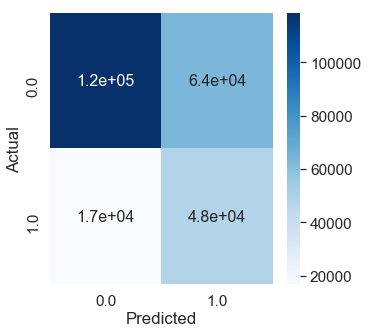

In [37]:
clf_lr = LogisticRegression(solver='lbfgs')
clf_lr.fit(train_features, train_labels)
# make predictions
expected = test_labels
predicted = clf_lr.predict(test_features)
# summarize the fit of the model
get_metrics(expected, predicted)

             precision    recall  f1-score   support

        0.0       0.98      0.98      0.98    182307
        1.0       0.94      0.94      0.94     65148

avg / total       0.97      0.97      0.97    247455

Sensitivity:   0.939
Specificity:   0.979
Pos_pred_val:  0.942
Neg_pred_val:  0.978
TPR:           0.939
FPR:           0.021
Accuracy:      0.969
precision:     0.942
recall:        0.939
f-score:       0.94
********************************************************************************
[[178545   3762]
 [  3991  61157]]
********************************************************************************


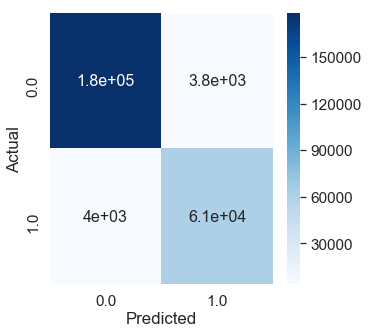

In [38]:
clf_knn = KNeighborsClassifier()
clf_knn.fit(train_features, train_labels)

# make predictions
expected = test_labels
predicted = clf_knn.predict(test_features)

# summarize the fit of the model
get_metrics(expected, predicted)

             precision    recall  f1-score   support

        0.0       0.98      0.96      0.97    182307
        1.0       0.90      0.94      0.92     65148

avg / total       0.96      0.96      0.96    247455

Sensitivity:   0.937
Specificity:   0.964
Pos_pred_val:  0.902
Neg_pred_val:  0.977
TPR:           0.937
FPR:           0.036
Accuracy:      0.957
precision:     0.902
recall:        0.937
f-score:       0.919
********************************************************************************
[[175702   6605]
 [  4096  61052]]
********************************************************************************


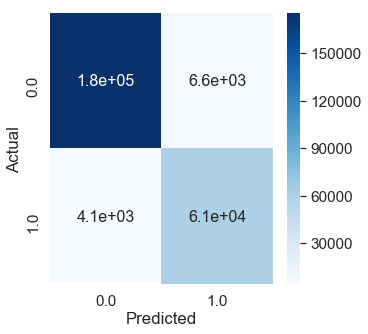

In [39]:
clf_dt = DecisionTreeClassifier()
clf_dt.fit(train_features, train_labels)

# make predictions
expected = test_labels
predicted = clf_dt.predict(test_features)

# summarize the fit of the model
get_metrics(expected, predicted)

             precision    recall  f1-score   support

        0.0       0.97      0.95      0.96    182307
        1.0       0.87      0.90      0.89     65148

avg / total       0.94      0.94      0.94    247455

Sensitivity:   0.904
Specificity:   0.953
Pos_pred_val:  0.874
Neg_pred_val:  0.965
TPR:           0.904
FPR:           0.047
Accuracy:      0.94
precision:     0.874
recall:        0.904
f-score:       0.889
********************************************************************************
[[173794   8513]
 [  6233  58915]]
********************************************************************************


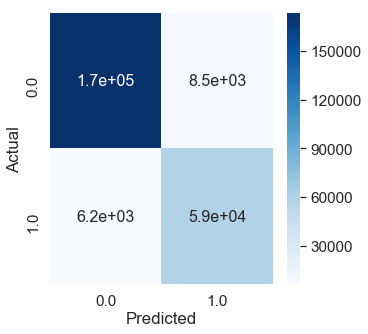

In [40]:
clf_ab = AdaBoostClassifier(n_estimators=100)
clf_ab.fit(train_features, train_labels)

# make predictions
expected = test_labels
predicted = clf_ab.predict(test_features)

# summarize the fit of the model
get_metrics(expected, predicted)

In [41]:
# first neural network with keras tutorial
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [42]:
dataX

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Bwd Pkt Len Mean,Flow Byts/s,Flow Pkts/s,...,RST Flag Cnt,ACK Flag Cnt,URG Flag Cnt,Down/Up Ratio,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Active Mean,Active Std,Idle Std
144899,3389.0,6.0,3809600.0,14.0,8.0,684.0,0.0,55.375000,4.816779e+02,5.774885e+00,...,1.0,0.0,0.0,0.0,8192.0,62646.0,20.0,0.0,0.000000e+00,0.000000e+00
307875,53.0,17.0,214.0,1.0,1.0,33.0,33.0,49.000000,3.831776e+05,9.345794e+03,...,0.0,0.0,0.0,1.0,-1.0,-1.0,8.0,0.0,0.000000e+00,0.000000e+00
118114,443.0,6.0,118296324.0,14.0,15.0,605.0,0.0,274.933333,4.536067e+01,2.451471e-01,...,1.0,0.0,0.0,1.0,8192.0,181.0,20.0,230671.5,1.719875e+05,1.255157e+05
194771,53.0,17.0,182460.0,2.0,2.0,36.0,36.0,159.000000,2.137455e+03,2.192261e+01,...,0.0,0.0,0.0,1.0,-1.0,-1.0,8.0,0.0,0.000000e+00,0.000000e+00
96848,51131.0,6.0,242281.0,2.0,0.0,0.0,0.0,0.000000,0.000000e+00,8.254878e+00,...,0.0,1.0,0.0,0.0,180.0,-1.0,20.0,0.0,0.000000e+00,0.000000e+00
306557,53.0,17.0,246.0,1.0,1.0,38.0,38.0,54.000000,3.739837e+05,8.130081e+03,...,0.0,0.0,0.0,1.0,-1.0,-1.0,8.0,0.0,0.000000e+00,0.000000e+00
8800,61421.0,6.0,26.0,2.0,0.0,0.0,0.0,0.000000,0.000000e+00,7.692308e+04,...,0.0,1.0,0.0,0.0,256.0,-1.0,20.0,0.0,0.000000e+00,0.000000e+00
115252,443.0,6.0,116993045.0,13.0,12.0,197.0,0.0,326.250000,3.856640e+01,2.136879e-01,...,1.0,0.0,0.0,0.0,8192.0,31.0,20.0,106406.0,4.050025e+04,5.414020e+05
69735,0.0,0.0,117792665.0,62.0,0.0,0.0,0.0,0.000000,0.000000e+00,5.263486e-01,...,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,34000000.0,4.130000e+07,1.220000e+07
118218,443.0,6.0,117513588.0,16.0,14.0,607.0,0.0,294.500000,4.567131e+01,2.552896e-01,...,1.0,0.0,0.0,0.0,8192.0,181.0,20.0,207918.5,1.396486e+05,6.997239e+05


In [43]:
#standardizing the input feature
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(dataX)
X

array([[-3.64955230e-01, -4.81651648e-01, -5.60257410e-02, ...,
        -6.16131410e-02, -4.86825286e-02, -1.53387608e-03],
       [-5.30813441e-01,  1.95734056e+00, -8.65644552e-02, ...,
        -6.16131410e-02, -4.86825286e-02, -1.53387608e-03],
       [-5.11423542e-01, -4.81651648e-01,  8.61780261e-01, ...,
         1.01077774e-01,  1.55756432e-01, -1.08631871e-03],
       ...,
       [-5.29471063e-01, -4.81651648e-01, -8.65648560e-02, ...,
        -6.16131410e-02, -4.86825286e-02, -1.53387608e-03],
       [-5.30813441e-01,  1.95734056e+00, -8.65644151e-02, ...,
        -6.16131410e-02, -4.86825286e-02, -1.53387608e-03],
       [-5.11423542e-01, -4.81651648e-01, -8.65643429e-02, ...,
        -6.16131410e-02, -4.86825286e-02, -1.53387608e-03]])

In [44]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(X, dataY, test_size = 0.30, random_state = 42,stratify=dataY)

In [45]:
# split into input (X) and output (y) variables
X = train_features
y = train_labels


In [46]:
# define the keras model
model = Sequential()
#First Hidden Layer
model.add(Dense(12, input_dim=28, activation='relu',kernel_initializer='random_normal'))
#Second  Hidden Layer
model.add(Dense(8, activation='relu',kernel_initializer='random_normal'))
#Output Layer
model.add(Dense(1, activation='sigmoid',kernel_initializer='random_normal'))

Instructions for updating:
Colocations handled automatically by placer.


In [47]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [48]:
# fit the keras model on the dataset
model.fit(X, y, epochs=10, batch_size=10000)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
577394/577394 [==============================] - 1s 2us/step - loss: 0.6770 - acc: 0.7271
Epoch 2/10
577394/577394 [==============================] - 1s 1us/step - loss: 0.5426 - acc: 0.8280
Epoch 3/10
577394/577394 [==============================] - 1s 1us/step - loss: 0.3173 - acc: 0.9266
Epoch 4/10
577394/577394 [==============================] - 1s 1us/step - loss: 0.2089 - acc: 0.9459
Epoch 5/10
577394/577394 [==============================] - 1s 1us/step - loss: 0.1776 - acc: 0.9482
Epoch 6/10
577394/577394 [==============================] - 1s 1us/step - loss: 0.1671 - acc: 0.9486
Epoch 7/10
577394/577394 [==============================] - 1s 1us/step - loss: 0.1609 - acc: 0.9490
Epoch 8/10
577394/577394 [==============================] - 1s 1us/step - loss: 0.1560 - acc: 0.9498
Epoch 9/10
577394/577394 [==============================] - 1s 1us/step - loss: 0.1512 - acc: 0.9509
Epoch 10/10
577394/577394 [================

In [49]:
eval_model=model.evaluate(train_features, train_labels)
eval_model

577394/577394 [==============================] - 5s 9us/step


[0.1439909451371656, 0.9517452554053613]

In [50]:
y_pred = model.predict(test_features)
y_pred =(y_pred>0.5)

             precision    recall  f1-score   support

        0.0       0.95      0.99      0.97    182252
        1.0       0.96      0.85      0.90     65203

avg / total       0.95      0.95      0.95    247455

Sensitivity:   0.852
Specificity:   0.987
Pos_pred_val:  0.958
Neg_pred_val:  0.949
TPR:           0.852
FPR:           0.013
Accuracy:      0.951
precision:     0.958
recall:        0.852
f-score:       0.902
********************************************************************************
[[179815   2437]
 [  9635  55568]]
********************************************************************************


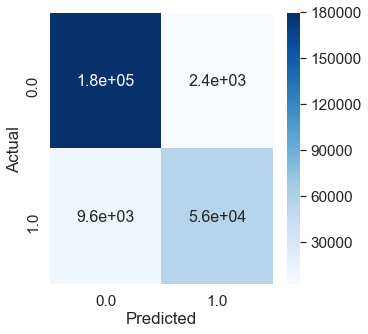

In [51]:
# make predictions
expected = test_labels
predicted = y_pred
# summarize the fit of the model
get_metrics(expected, predicted)